In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

$$p(x; \alpha, \beta) = \exp\left[-\left(\frac{x}{\alpha}\right)^\beta\right] - \exp\left[-\left(\frac{x + 1}{\alpha}\right)^\beta\right] $$

In [2]:
def weibull_pmf(x, a, b):
    return np.exp(-np.power(x/a, b)) - np.exp(-np.power((x + 1)/a, b))

def weibull_pmf_mean(a, b):
    xs = np.arange(100) # approximation of convergent infinite sum
    mean = np.sum(xs * weibull_pmf(xs, a, b))
    return mean

def weibull_pmf_sd(a, b):
    xs = np.arange(100) # approximation of convergent infinite sum
    mean = np.sum(xs * weibull_pmf(xs, a, b))
    std = np.sqrt((np.sum((xs - mean) ** 2)))/(len(xs))
    return std

def generate_fake_data():
    alpha_hat = pd.Series(np.arange(80, 20, -6/8) + np.random.randn(80) * 5)
    beta_hat = pd.Series(np.linspace(20, 30, 80) + np.random.randn(80) * 5)
    df = pd.concat([alpha_hat, beta_hat], axis=1)
    df.columns=['alpha_hat', 'beta_hat']
    df['user_id'] = 1
    return df

def plot_user_pred(df, actual_tte):
    df['mean'] = df.apply(lambda x: weibull_pmf_mean(x['alpha_hat'], x['beta_hat']), axis=1)
    df['sd'] = df.apply(lambda x: weibull_pmf_sd(x['alpha_hat'], x['beta_hat']), axis=1)
    df['lower'] = df['mean'] - 1.96 * df['sd']
    df['upper'] = df['mean'] + 1.96 * df['sd']
    df['actual_tte'] = np.maximum(0, actual_tte - df.reset_index().index)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(df['actual_tte'])
    ax.plot(df['mean'], linestyle='--')

    ax.fill_between(df.index, df['lower'], df['upper'],
                    where=(df['lower'] < df['upper']),
                    facecolor='lightgray', interpolate=True)

    ax.set_title('Mean Weibull TTE at each time step')
    ax.set_xlabel('t')
    ax.set_ylabel('TTE (days)')
    ax.legend()
    plt.show()

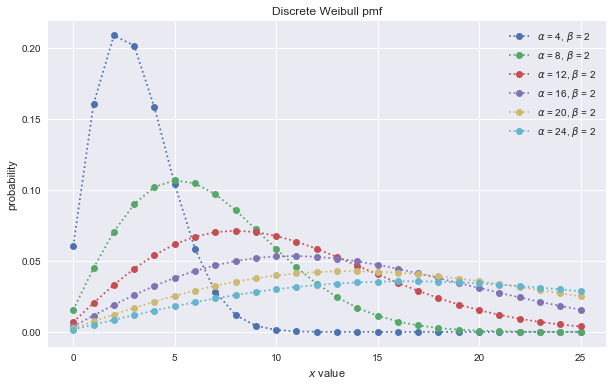

In [3]:
# fix beta; show different alphas

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

beta = 2

for alpha in [4, 8, 12, 16, 20, 24]:
    xs = np.linspace(0, 25, 26)
    ys = weibull_pmf(xs, alpha, beta)

    ax.plot(xs, ys,
            linestyle=':',
            marker='o',
            label=r'$\alpha$ = {}, $\beta$ = {}'.format(alpha, beta))

ax.set_title('Discrete Weibull pmf')
ax.set_xlabel('$x$ value')
ax.set_ylabel('probability')
ax.legend()
plt.show()

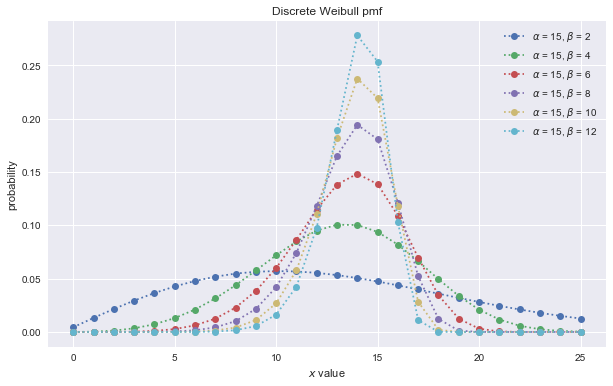

In [4]:
# fix alpha; show different betas

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

alpha = 15

for beta in [2, 4, 6, 8, 10, 12]:
    xs = np.linspace(0, 25, 26)
    ys = weibull_pmf(xs, alpha, beta)

    ax.plot(xs, ys,
            linestyle=':',
            marker='o',
            label=r'$\alpha$ = {}, $\beta$ = {}'.format(alpha, beta))

ax.set_title('Discrete Weibull pmf')
ax.set_xlabel('$x$ value')
ax.set_ylabel('probability')
ax.legend()
plt.show()

In [5]:
df_user = generate_fake_data()

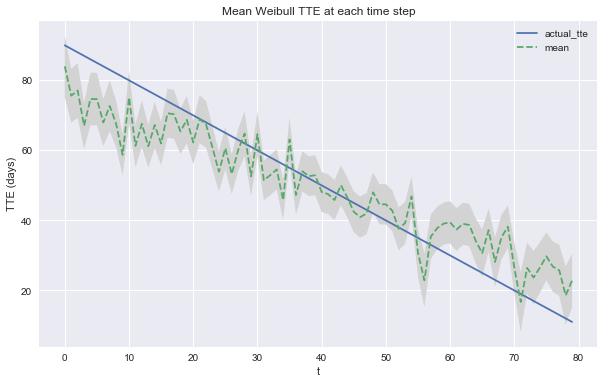

In [6]:
plot_user_pred(df_user, actual_tte=90)